# Trabajar el dataset

In [56]:
!pip install tensorflow
!pip install keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
df = pd.read_csv('/content/TestReviews.csv')
df
#1 positivo 0 negativo

,review,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1
...,...,...
4316,My wife and I caught this show at the Golden N...,0
4317,This was the dumbest show we have ever seen. ...,0
4318,My girlfriend and I went to this show. It was ...,0
4319,The restrooms looked like after an bombardment...,0


In [58]:
df["class"].unique()

array([1, 0])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['class'], test_size=0.2, random_state=42)


# Ahora puedes usar train_df para entrenar y test_df para evaluar tu modelo
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))



Tamaño del conjunto de entrenamiento: 3456
Tamaño del conjunto de prueba: 865


# Ejemplo con random forest

Exactitud: 0.8971098265895954
Precisión: 0.8843441466854725
Sensibilidad (Recall): 0.9889589905362776
Puntuación F1: 0.9337304542069993


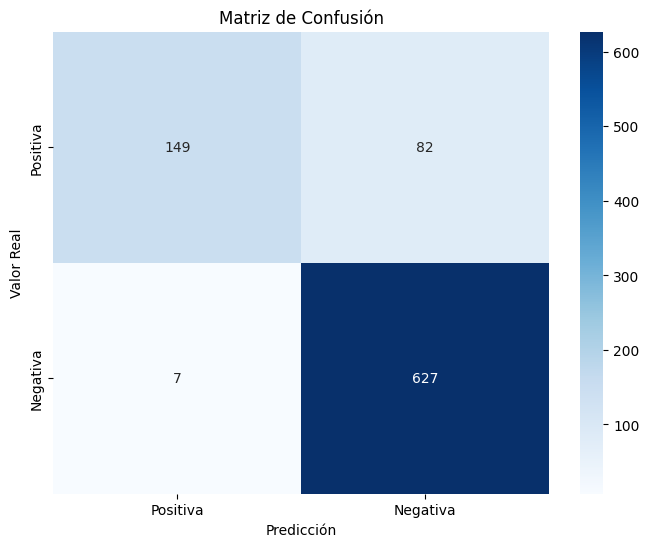

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Vectorización usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar el modelo RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Ajusta n_estimators según sea necesario
rf_classifier.fit(X_train_vec, y_train)

# Predicciones
y_pred = rf_classifier.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Ejemplo con Naive Bayes

Exactitud: 0.9560693641618497
Precisión: 0.9641744548286605
Sensibilidad (Recall): 0.9763406940063092
Puntuación F1: 0.9702194357366771


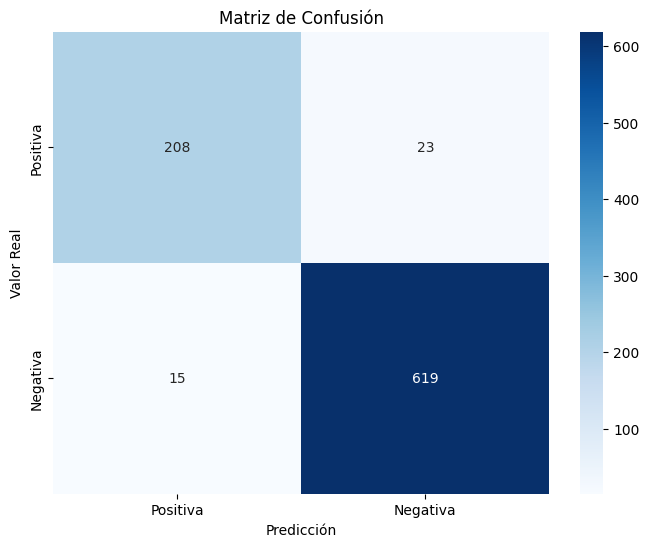

In [ ]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Vectorización usando CountVectorizer (para Naive Bayes)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar el modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predicciones
y_pred = nb_classifier.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Ejemplo de Arbol de decision DT

Exactitud: 0.8254335260115607
Precisión: 0.8901453957996769
Sensibilidad (Recall): 0.8690851735015773
Puntuación F1: 0.879489225857941


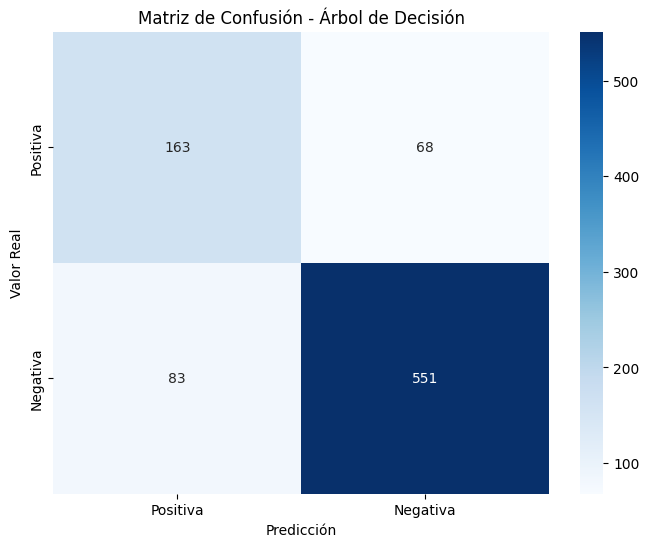

In [ ]:


from sklearn.tree import DecisionTreeClassifier

# Vectorización usando TF-IDF (puedes usar CountVectorizer también)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar el modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)  # Puedes ajustar hiperparámetros aquí
dt_classifier.fit(X_train_vec, y_train)

# Predicciones
y_pred = dt_classifier.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# Deep Learning

In [60]:
# Datos de ejemplo (reemplaza con tus propios datos)


# Preprocesamiento del texto
tokenizer = Tokenizer(num_words=100) # Ajusta el número de palabras según tus datos
tokenizer.fit_on_texts(X_train)
secuencias = tokenizer.texts_to_sequences(X_train)
secuencias_padding = pad_sequences(secuencias)

# Definir el modelo LSTM
modelo = keras.Sequential([
    keras.layers.Embedding(100, 16, input_length=secuencias_padding.shape[1]),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(secuencias_padding, y_train, epochs=40) # Ajusta el número de épocas según tus datos


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6843 - loss: 2.4144
Epoch 2/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.7875 - loss: 0.7793
Epoch 3/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8543 - loss: 0.4260
Epoch 4/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8561 - loss: 0.4044
Epoch 5/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8541 - loss: 0.3839
Epoch 6/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8423 - loss: 0.3877
Epoch 7/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8723 - loss: 0.3504
Epoch 8/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8547 - loss: 0.3653
Epoch 9/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8792 - loss: 0.3429
Epoch 10/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8697 - loss: 0.3316
Epoch 11/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8648 - loss: 0.3567
Epoch 12/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/ste

In [61]:
secuencias_padding

array([[ 0,  0,  0, ..., 55, 15, 31],
       [ 0,  0,  0, ..., 22, 96, 57],
       [ 0,  0,  0, ..., 68,  2, 11],
       ...,
       [ 0,  0,  0, ...,  7,  2, 40],
       [ 0,  0,  0, ...,  6, 11,  7],
       [ 0,  0,  0, ...,  2, 12, 28]], dtype=int32)

In [62]:
secuencia_nueva = tokenizer.texts_to_sequences(X_test)
secuencia_padding_nueva = pad_sequences(secuencia_nueva, maxlen=secuencias_padding.shape[1]) # Asegúrate de que tenga la misma longitud que las secuencias de entrenamiento
y_predict = modelo.predict(secuencia_padding_nueva)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Exactitud: 0.846242774566474
Precisión: 0.8957345971563981
Sensibilidad (Recall): 0.8943217665615142
Puntuación F1: 0.8950276243093923


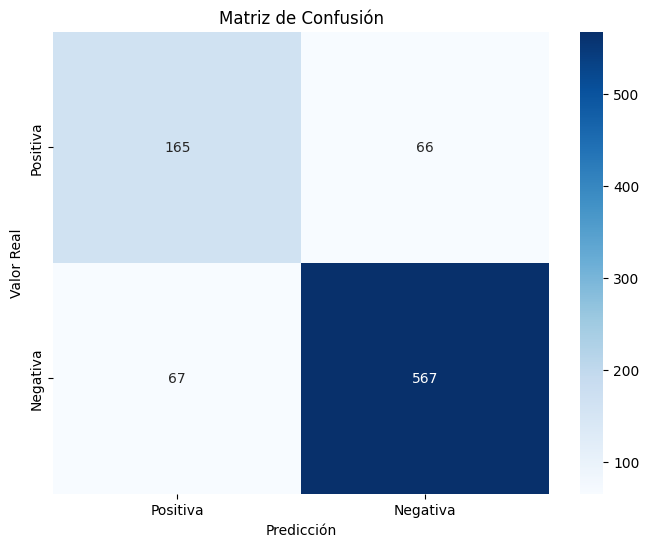

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir las probabilidades predichas a clases (0 o 1)
y_pred_classes = (y_predict > 0.5).astype(int)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

